## K-Nearest Neighbors(KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [5]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

## Train|Test Split and Scaling Data

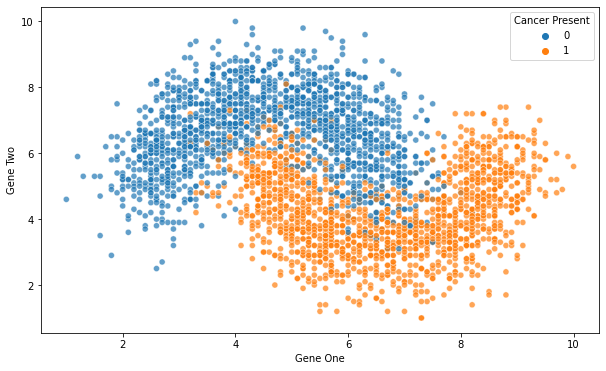

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

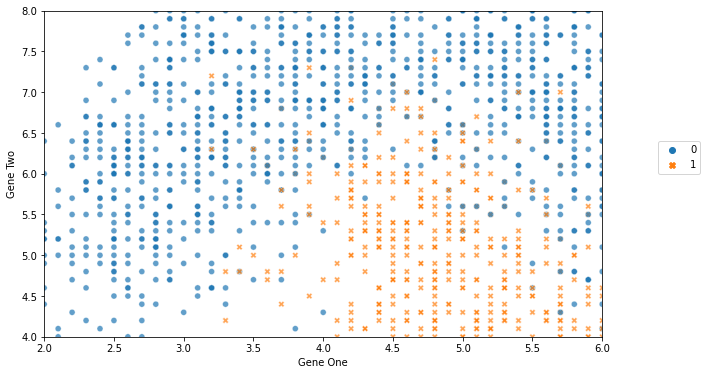

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)
plt.legend(loc=(1.1,0.5));

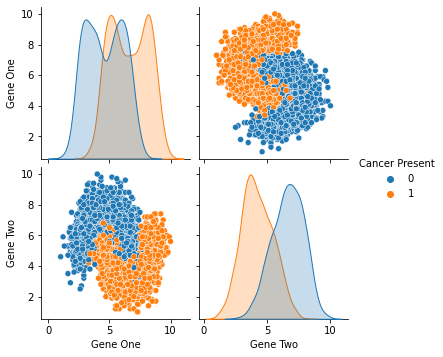

In [8]:
sns.pairplot(data=df, hue="Cancer Present");

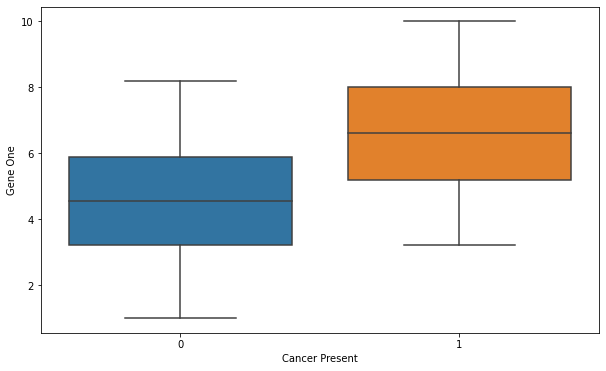

In [9]:
sns.boxplot(x="Cancer Present", y="Gene One", data=df);

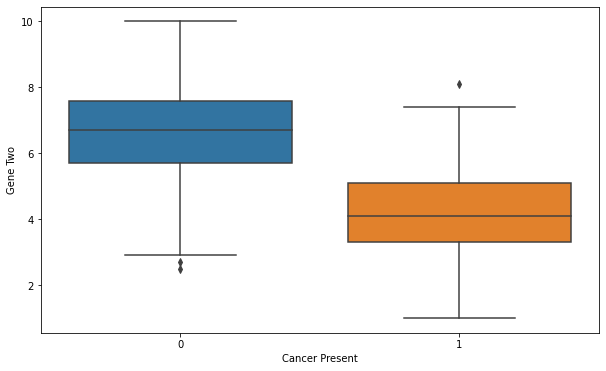

In [10]:
sns.boxplot(x="Cancer Present", y="Gene Two", data=df);

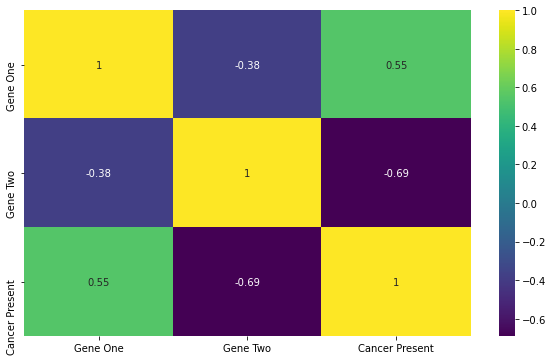

In [11]:
sns.heatmap(df.corr(), cmap="viridis", annot=True);

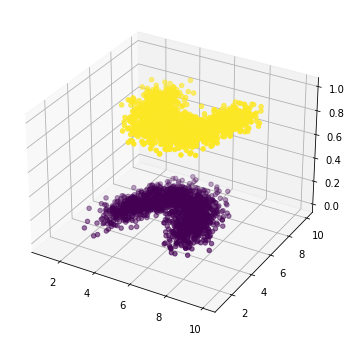

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop("Cancer Present", axis=1)
y = df["Cancer Present"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [22]:
y_pred_proba = knn_model.predict_proba(scaled_X_test)
pd.DataFrame(y_pred_proba).sample(10)

,0,1
106,1.0,0.0
884,0.8,0.2
361,0.0,1.0
536,1.0,0.0
803,0.6,0.4
593,0.0,1.0
889,1.0,0.0
502,1.0,0.0
366,0.0,1.0
45,0.0,1.0


In [23]:
my_dict = {"Actual": y_test, "Pred":y_pred,"Pred_proba_0":y_pred_proba[:,0], "Pred_proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Pred_proba_0,Pred_proba_1
44,1,1,0.0,1.0
141,0,0,1.0,0.0
2136,0,0,1.0,0.0
1557,0,0,1.0,0.0
2569,0,1,0.4,0.6
2419,1,1,0.0,1.0
2453,0,0,0.8,0.2
1725,0,0,1.0,0.0
324,1,0,0.8,0.2
677,0,0,1.0,0.0


## Model Performance on Classification Tasks

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

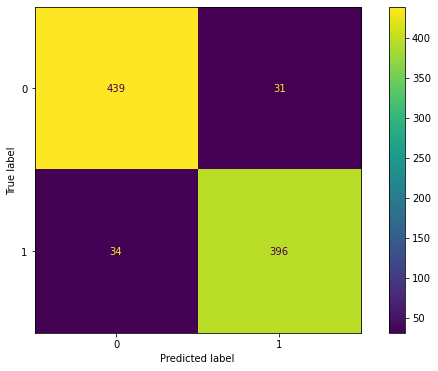

In [25]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values

In [27]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [28]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

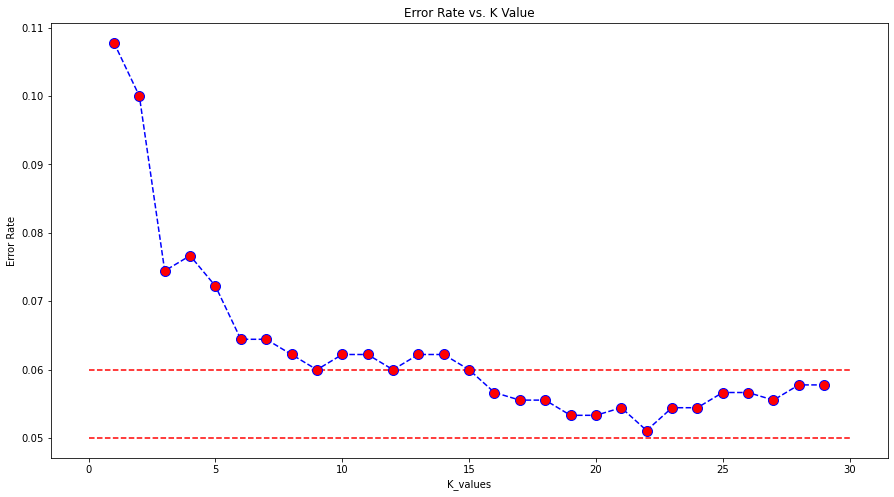

In [29]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

## Scores by Various K Values

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[420  50]
 [ 47 383]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [31]:
# NOW WITH K=22
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)
print('WITH K=22')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=22


[[452  18]
 [ 28 402]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [32]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[445  25]
 [ 29 401]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Cross Validate For Optimal K Value

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate

In [34]:
model = KNeighborsClassifier(n_neighbors=9)
scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002001,0.010735,0.914286,0.923810,0.906542,0.915094
2,0.002000,0.009002,0.947619,0.944444,0.953271,0.948837
3,0.001001,0.008872,0.947619,0.970588,0.925234,0.947368
4,0.001231,0.008997,0.866667,0.876190,0.859813,0.867925
5,0.001961,0.009002,0.923810,0.909910,0.943925,0.926606
6,0.001000,0.010005,0.909524,0.915094,0.906542,0.910798
7,0.001000,0.010002,0.933333,0.911504,0.962617,0.936364
8,0.002000,0.009418,0.938095,0.927273,0.953271,0.940092
9,0.001001,0.009004,0.961905,0.980583,0.943925,0.961905
10,0.001001,0.008932,0.895238,0.869565,0.934579,0.900901


In [35]:
df_scores.mean()[2:]

test_accuracy     0.923810
test_precision    0.922896
test_recall       0.928972
test_f1           0.925589
dtype: float64

## Cross Validate for Label = 0

In [36]:
from sklearn.metrics import make_scorer

In [37]:
scoring = {'precision-0': make_scorer(precision_score,  pos_label=0),
           'recall-0': make_scorer(recall_score, pos_label =0),
           'f1-0': make_scorer(f1_score, pos_label = 0)}

In [38]:
model = KNeighborsClassifier(n_neighbors=9)
scores = cross_validate(model, scaled_X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision-0,test_recall-0,test_f1-0
1,0.002001,0.011012,0.904762,0.922330,0.913462
2,0.000983,0.009281,0.950980,0.941748,0.946341
3,0.001996,0.008893,0.925926,0.970874,0.947867
4,0.000996,0.009005,0.857143,0.873786,0.865385
5,0.001000,0.008473,0.939394,0.902913,0.920792
6,0.001000,0.009003,0.903846,0.912621,0.908213
7,0.001000,0.008996,0.958763,0.902913,0.930000
8,0.001000,0.009002,0.950000,0.922330,0.935961
9,0.001000,0.009001,0.943925,0.980583,0.961905
10,0.001000,0.009002,0.926316,0.854369,0.888889


In [39]:
df_scores.mean()[2:]

test_precision-0    0.926106
test_recall-0       0.918447
test_f1-0           0.921881
dtype: float64

## Predict New Observation

In [40]:
new_observation = [[3.5, 4.3]]

In [41]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [42]:
new_observation = scaler.transform(new_observation)
new_observation

array([[-1.1393583 , -0.62176572]])

In [43]:
knn_model.predict(new_observation)

array([0], dtype=int64)

In [44]:
knn_model.predict_proba(new_observation)

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
knn_grid = KNeighborsClassifier()

In [47]:
k_values= range(1,30)

In [48]:
param_grid = {"n_neighbors":k_values, "p":[1,2], "weights": ['uniform',"distance"]}

In [49]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [50]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
knn_grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=21, p=1)

In [52]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [53]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)
print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=21


[[447  23]
 [ 27 403]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Evaluating ROC Curves and AUC

In [54]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

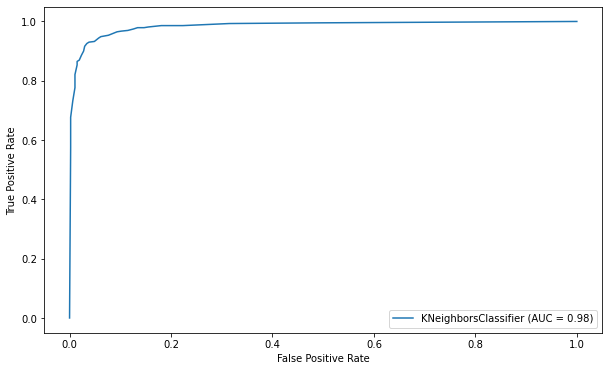

In [55]:
plot_roc_curve(knn_model, scaled_X_test, y_test)

## Final Model and Model Deployment

In [56]:
import pickle

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
X_scaled = scaler.transform(X)

In [60]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)
final_knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=9)

In [61]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [62]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

In [63]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [64]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

## Predict New Observations

In [65]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [66]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [67]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [68]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [69]:
samples_scaled = loaded_scaler.transform(samples)

In [70]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [71]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
